In [1]:
import cv2

In [2]:
import python.darknet as dn
from python.darknet import detect
import matplotlib.pyplot as plt

In [3]:
weights = 'yolov4.weights'
netcfg  = 'cfg/yolov4.cfg'
data = 'cfg/coco.data'

In [4]:
net  = dn.load_net(netcfg.encode('utf-8'), weights.encode('utf-8'), 0)
meta = dn.load_meta(data.encode('utf-8'))

In [5]:
img = cv2.imread('data/dog.jpg')

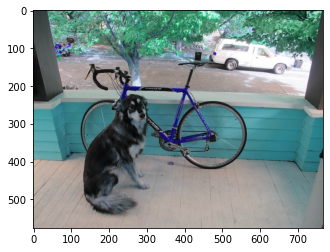

In [6]:
plt.imshow(img)

In [7]:
def convertBack(x, y, w, h):
    xmin = int(round(x - (w / 2)))
    xmax = int(round(x + (w / 2)))
    ymin = int(round(y - (h / 2)))
    ymax = int(round(y + (h / 2)))
    return xmin, ymin, xmax, ymax

In [8]:
def cvDrawBoxes(detections, img):
    for detection in detections:
        x, y, w, h = detection[2][0],\
            detection[2][1],\
            detection[2][2],\
            detection[2][3]
        xmin, ymin, xmax, ymax = convertBack(
            float(x), float(y), float(w), float(h))
        pt1 = (xmin, ymin)
        pt2 = (xmax, ymax)
        cv2.rectangle(img, pt1, pt2, (0, 255, 0), 1)
        cv2.putText(img,
                    detection[0].decode() +
                    " [" + str(round(detection[1] * 100, 2)) + "]",
                    (pt1[0], pt1[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    [0, 255, 0], 2)
    return img

In [9]:
detected = detect(net, meta, img, thresh=0.5)

In [10]:
detected

[(b'dog',
  0.9789605140686035,
  (220.94207763671875,
   383.2156677246094,
   184.26205444335938,
   316.3636474609375)),
 (b'bicycle',
  0.9227122664451599,
  (343.51971435546875, 276.90643310546875, 458.0400390625, 298.7538757324219)),
 (b'truck',
  0.9198353886604309,
  (574.2489013671875,
   123.26062774658203,
   220.62359619140625,
   93.21975708007812))]

In [11]:
frame = cvDrawBoxes(detected, img)

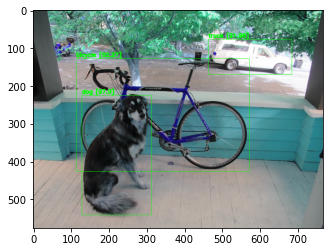

In [12]:
plt.imshow(frame)